<a href="https://colab.research.google.com/github/solita/a-ice/blob/main/notebooks/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/Shareddrives/A-ICE/Data/AIS+ICE/winter_dataset.csv')

In [3]:
def mean_error(y_test, pred):
    return np.mean(np.abs(pred-y_test))

In [13]:
errors = []
importance = []
mmsis = df.mmsi.unique()
for mmsi in mmsis:
    train_set = df.loc[df.mmsi==mmsi]
    test_set = df.loc[df.mmsi!=mmsi]
    x_train = train_set[['wind_hailuoto','temperature_hailuoto', 'ice_thickness', 'ice_concentration']]
    x_test = test_set[['wind_hailuoto', 'temperature_hailuoto', 'ice_thickness', 'ice_concentration']]
    y_train = train_set['speed']
    y_test = test_set['speed']
    y_train = np.ravel(y_train)
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    errors.append([mean_error(y_test,prediction)])
    importance.append(model.feature_importances_)



In [5]:
print(errors)

[[2.3588007177874517], [1.679657319721975], [1.7370674351579767], [1.4668223762422292], [1.3930540871214732], [1.574224591973444], [1.8993476590638063], [1.4144539741102045], [1.4353445153801723], [1.3966472263412337], [1.4009703569319905], [2.0486538679716992], [1.701145475865965], [1.9634050308084723], [2.061226275695824], [1.5202172609940232], [1.7206708633576746], [1.4369307047991404], [1.4044766236561816], [1.380292077457584], [2.0570810025162216], [4.131989536498703], [1.5118079603384675], [2.8660971899749748], [1.783754583074583], [1.4213697571677597], [1.7461175835762044], [2.898749438470768], [2.705221722091989], [1.4313054718765368], [1.4532671445487715], [2.1729740921651675], [1.4764685331172824], [1.4234803990681768], [1.5293095262844396], [2.088846966772699], [1.557874186573074], [1.386969305291364], [1.3753069857719473], [1.491278867081594], [1.7042450226537484], [1.9822404734351802], [1.7310970501084835], [1.612761371505878], [1.6404814800026686], [1.505074602183105], [1

In [6]:
print(importance)

[array([0.15134173, 0.74508014, 0.06816236, 0.03541578]), array([0.23763858, 0.45594623, 0.18634075, 0.12007445]), array([0.0868973 , 0.27810954, 0.391991  , 0.24300217]), array([0.76268295, 0.19929764, 0.01749002, 0.02052939]), array([0.20956354, 0.52671029, 0.06486013, 0.19886604]), array([0.09994897, 0.34566837, 0.00153283, 0.55284983]), array([0.16998826, 0.7183278 , 0.04945006, 0.06223389]), array([0.40240085, 0.5247863 , 0.03155622, 0.04125663]), array([0.13862106, 0.51230704, 0.2389186 , 0.11015329]), array([0.58092842, 0.37436837, 0.00584903, 0.03885418]), array([0.47863284, 0.06569374, 0.03408298, 0.42159044]), array([0.12651458, 0.16360279, 0.00952321, 0.70035942]), array([0.11060874, 0.05152174, 0.82389928, 0.01397024]), array([0.11527626, 0.44939573, 0.31010201, 0.12522601]), array([0.35747768, 0.30984944, 0.2174609 , 0.11521198]), array([9.04607457e-03, 1.70924083e-02, 2.22813763e-04, 9.73638703e-01]), array([0.17728368, 0.68250907, 0.09427889, 0.04592836]), array([0.71313

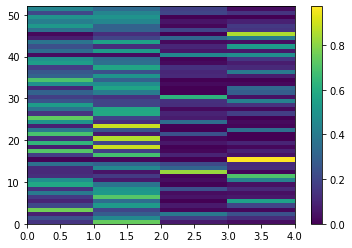

In [7]:
import matplotlib.pyplot as plt

plt.pcolormesh(importance)
plt.colorbar()

In [ ]:
print_accuracy(.predict)

In [9]:
pip install shap

     |████████████████████████████████| 358kB 6.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491633 sha256=9a948767f5c340855658016a9a0ddb45245051027094f25d200720e283e43246
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [10]:
import shap

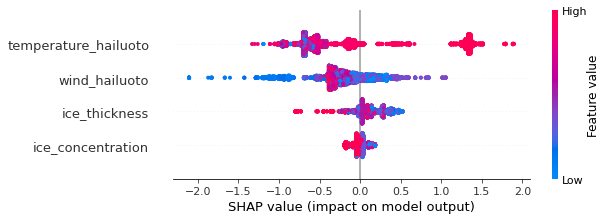

In [17]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


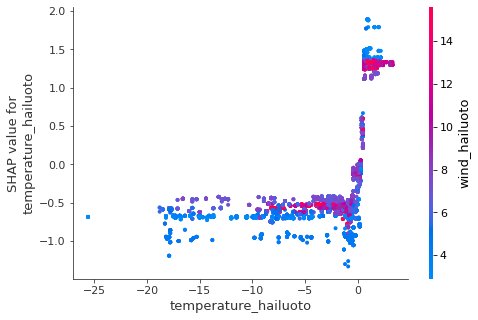

In [18]:
shap.dependence_plot("temperature_hailuoto", shap_values, x_test)

In [19]:
shap.force_plot(explainer.expected_value, shap_values, x_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.
